Reading file ../data/shapes/cube100k.xyz...	


File ../data/shapes/cube100k.xyz read in 0.14044785499573 seconds.	


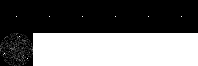

done	


In [27]:
require 'torch'
require 'math'
require 'image'

local base_path = '../'
local shape_path = 'data/shapes/'
local shape_name = 'cube100k'
local out_path = 'data/out/'
local vis_path = 'data/vis/'

-- all of these points are on a plane far away from edges, so their hough transforms should have a single maximum at the origin
-- except point 23043 which is almost exactly on a corner
local point_inds = torch.FloatTensor({694,2240,675,2026,96438,3115,23043});
local num_of_samples = 1000
local hough_vis_max = 10

local Mesh = require('mesh')

local xyz_filename = base_path .. shape_path .. shape_name .. '.xyz'
local v = Mesh.readXYZ(xyz_filename)

-- print(v[{{},{1}}]:min())
-- print(v[{{},{1}}]:max())
-- print(v[{{},{2}}]:min())
-- print(v[{{},{2}}]:max())
-- print(v[{{},{3}}]:min())
-- print(v[{{},{3}}]:max())

local hough_save_name = base_path .. out_path .. shape_name .. '_hough_100.txt'
local hough = torch.load(hough_save_name, 'ascii')

local hough = hough:view(hough:size(1),math.sqrt(hough:size(2)),math.sqrt(hough:size(2)))

-- print(torch.div(hough,num_of_samples):max())
-- print(torch.div(hough,num_of_samples):min())

point_inds_array = {};
for i=1,point_inds:nElement() do
    image.save(
        string.format('%s%s%s_hough_%d_%.2f_%.2f_%.2f.png',base_path,vis_path,shape_name,point_inds[i],v[{point_inds[i],1}],v[{point_inds[i],2}],v[{point_inds[i],3}]),
        torch.clamp(torch.div(hough[{point_inds[i],{},{}}],hough_vis_max),0,1))
    
--     print('----')
--     print(hough[{point_inds[i],{},{}}]:min())
--     print(hough[{point_inds[i],{},{}}]:max())
--     print(torch.div(hough[{point_inds[i],{},{}}],num_of_samples):min())
--     print(torch.div(hough[{point_inds[i],{},{}}],num_of_samples):max())
    point_inds_array[i] = point_inds[i]
end

itorch.image(torch.div(hough:index(1,point_inds:long()),hough_vis_max),{min=0,max=1})
-- itorch.image(torch.div(hough:index(1,torch.range(1,100):long()),hough_vis_max),{min=0,max=1})


print('done')
